In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_excel('***.xlsx', sheet_name='data')

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df['client'].unique()

array(['Бета', 'Гамма', 'Псилон', 'Сигма', 'Дельта', 'Микрон', 'Альфа',
       'Зета', 'Мета', 'Омега', 'Лямбда'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11912 entries, 0 to 11911
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   client                   11912 non-null  object        
 1   client_id                11912 non-null  int64         
 2   month                    11912 non-null  datetime64[ns]
 3   category                 11912 non-null  object        
 4   device                   11912 non-null  object        
 5   place                    11912 non-null  object        
 6   bannertype               11912 non-null  object        
 7   querytype (search only)  11912 non-null  object        
 8   targetingtype            11912 non-null  object        
 9   shows                    11912 non-null  int64         
 10  clicks                   11912 non-null  int64         
 11  cost_rub_wo_nds          11912 non-null  float64       
 12  сonversions              11912 n

In [6]:
df.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
client,11912,11,Псилон,3144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
client_id,11912.0,NaN,NaN,NaN,391221.887173,234679.0,285755.0,333348.0,458303.0,993003.0,165094.604865
month,11912,NaN,NaN,NaN,2019-12-20 11:11:02.458025728,2019-04-01 00:00:00,2019-08-01 00:00:00,2020-01-01 00:00:00,2020-05-01 00:00:00,2020-09-01 00:00:00,NaN
category,11912,10,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,2595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device,11912,2,Desktop,6144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
place,11912,2,Search,6889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bannertype,11912,7,text,7734,NaN,NaN,NaN,NaN,NaN,NaN,NaN
querytype (search only),11912,4,none,5023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
targetingtype,11912,3,Phrase,9068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shows,11912.0,NaN,NaN,NaN,1543281.209033,0.0,2.0,12025.0,125092.5,583150600.0,14504237.59827


In [7]:
df.head()

,client,client_id,month,category,device,place,bannertype,querytype (search only),targetingtype,shows,clicks,cost_rub_wo_nds,сonversions
0,Бета,234679,2020-07-01,ВКЛАДЫ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.000000,0
1,Гамма,458303,2019-04-01,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Phrase,76722,2002,19467.482339,3
2,Гамма,458303,2019-04-01,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Retargeting,9260,116,2590.924703,0
3,Гамма,458303,2019-06-01,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Retargeting,0,0,0.000000,0
4,Гамма,458303,2019-04-01,ДЕБЕТОВЫЕ КАРТЫ,Mobile,Networks,cpc_video,none,Phrase,27140,825,4181.504949,0


In [8]:
df = df.query('"2020-01-01"<=month<="2020-08-31"')

In [9]:
df = df.query('category=="ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ"')

In [10]:
df = df[df['сonversions']-df['cost_rub_wo_nds']<=0]

In [11]:
df['visits_per_ruble'] = df['сonversions'] / df['cost_rub_wo_nds']

In [12]:
df = df.fillna(0)

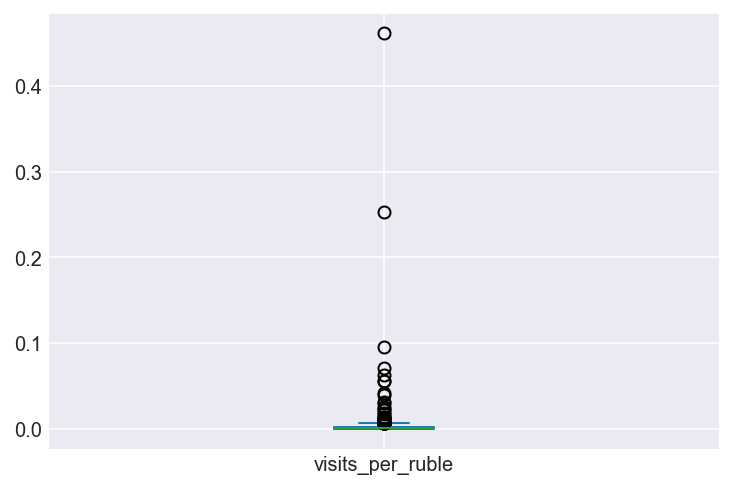

In [13]:
df['visits_per_ruble'].plot.box();

In [14]:
df = df.query('visits_per_ruble<.2')

In [15]:
df.groupby('client')['visits_per_ruble'].mean()

client
Альфа     0.001250
Бета      0.001369
Гамма     0.002885
Зета      0.000666
Лямбда    0.002504
Мета      0.003943
Омега     0.001455
Псилон    0.002311
Сигма     0.004849
Name: visits_per_ruble, dtype: float64

In [16]:
def bar(feature, title, xlabel, top):
    '''
    Функция принимает параметр, по которому будет проводиться срез для построения столбчатых диаграмм, заголовок и подпись оси X.
    Возвращает столбчатую диаграмму в разрезе параметров и банков.
    
    Параметры функции:
    feature (str) — название столбца, по которому будет проводиться срез
    title (str) — заголовок графика
    xlabel (str) — подпись оси X
    top (float) — верхняя граница оси Y
    '''
    plt.figure(figsize=(12,6))
    plt.title(title, fontsize=20, fontweight='bold')
    ax = sns.barplot(x=feature, y='visits_per_ruble', hue='client', data=df, ci=None, palette='crest')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Количество целевых визитов на потраченный рубль', fontsize=12)
    plt.ylim(0,top)
    features = len(df[feature].unique())
    for i in range(features):
        ax.patches[features*4+i].set_facecolor('salmon')
    ax.legend();

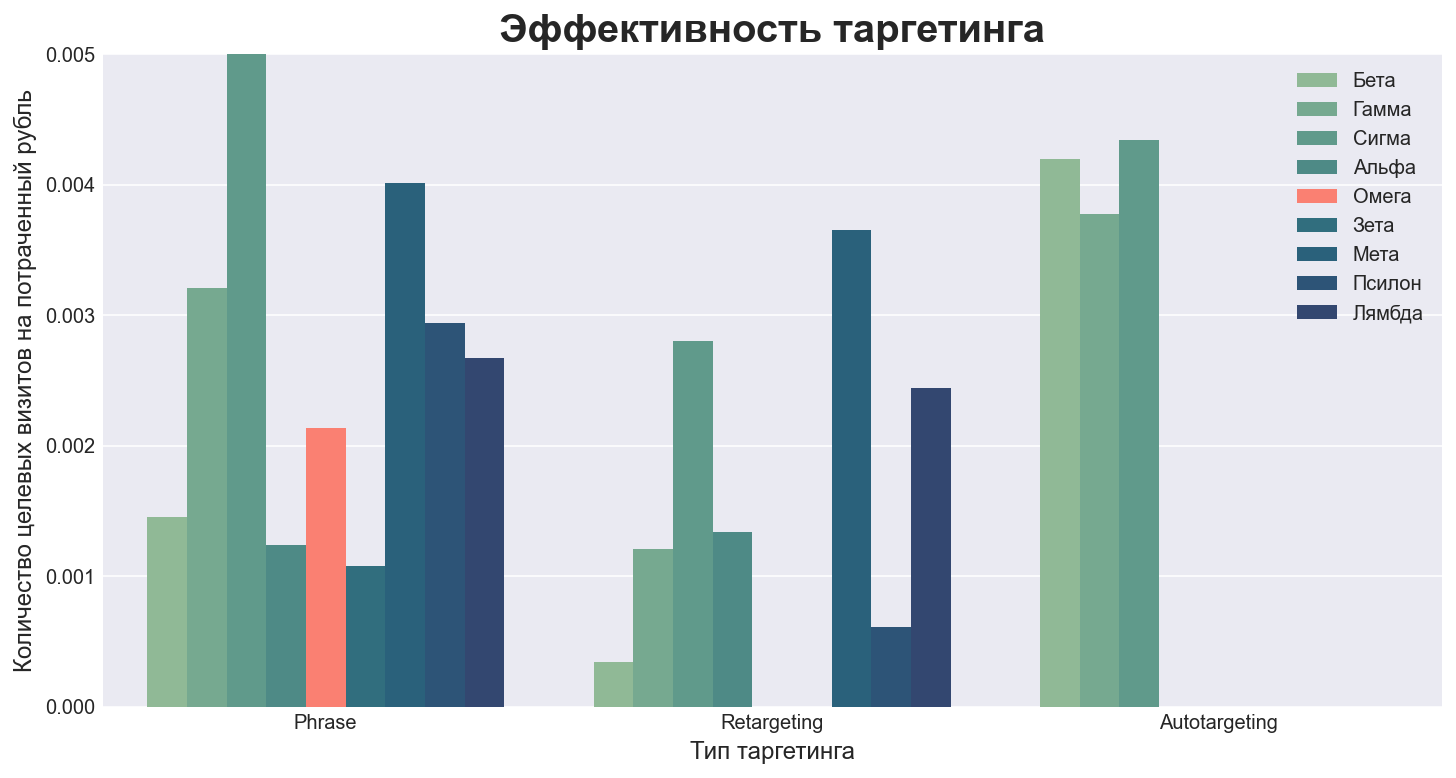

In [17]:
bar('targetingtype', 'Эффективность таргетинга', 'Тип таргетинга', .005)

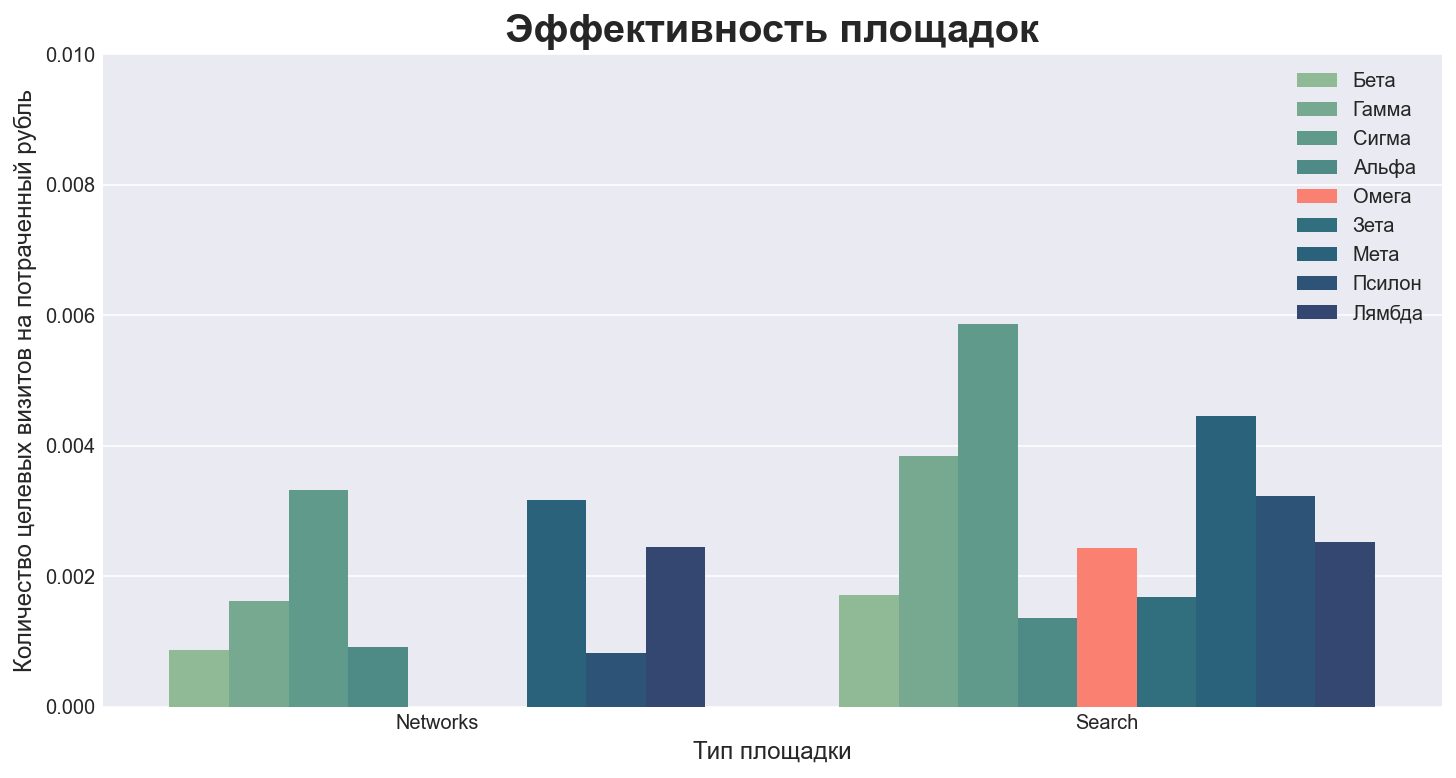

In [18]:
bar('place', 'Эффективность площадок', 'Тип площадки', .01)

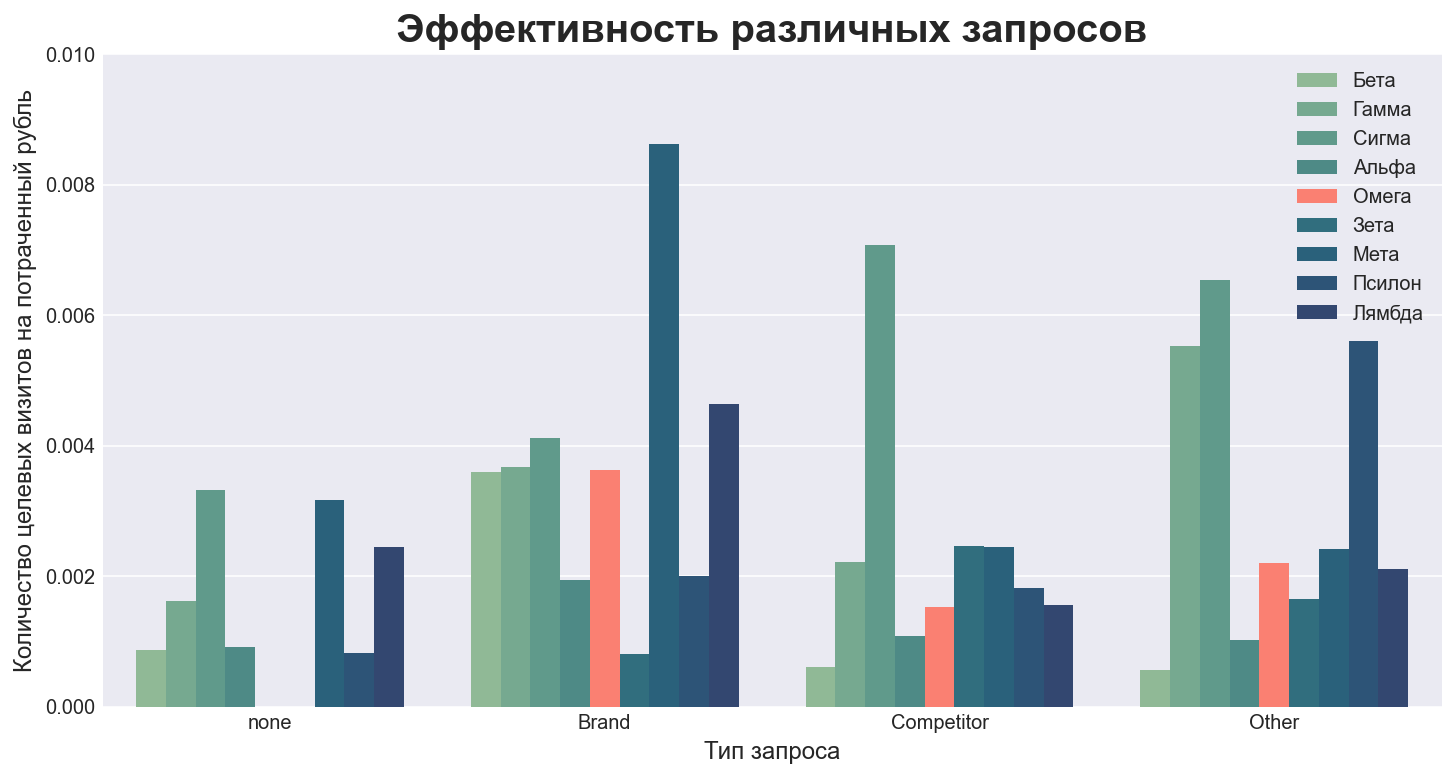

In [19]:
bar('querytype (search only)', 'Эффективность различных запросов', 'Тип запроса', .01)

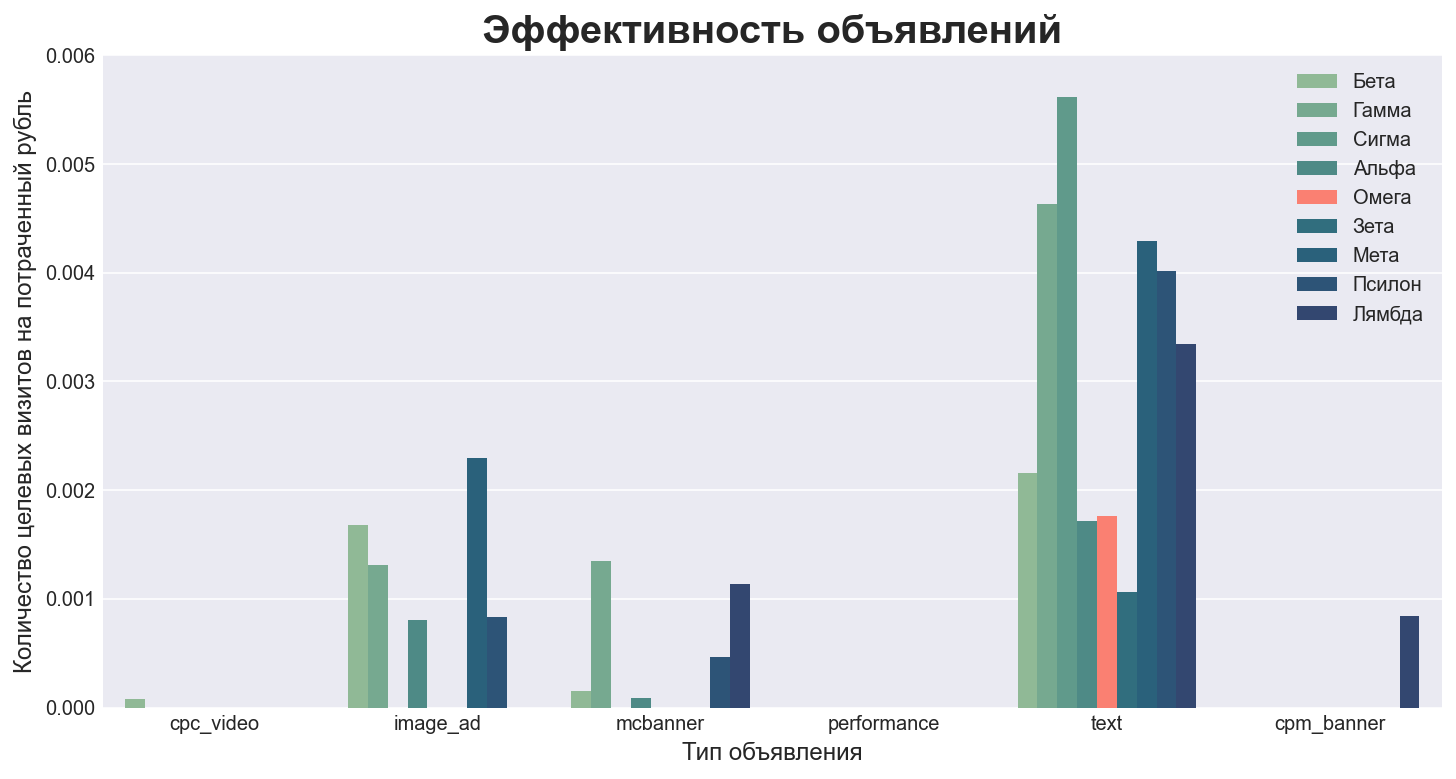

In [20]:
bar('bannertype', 'Эффективность объявлений', 'Тип объявления', .006)

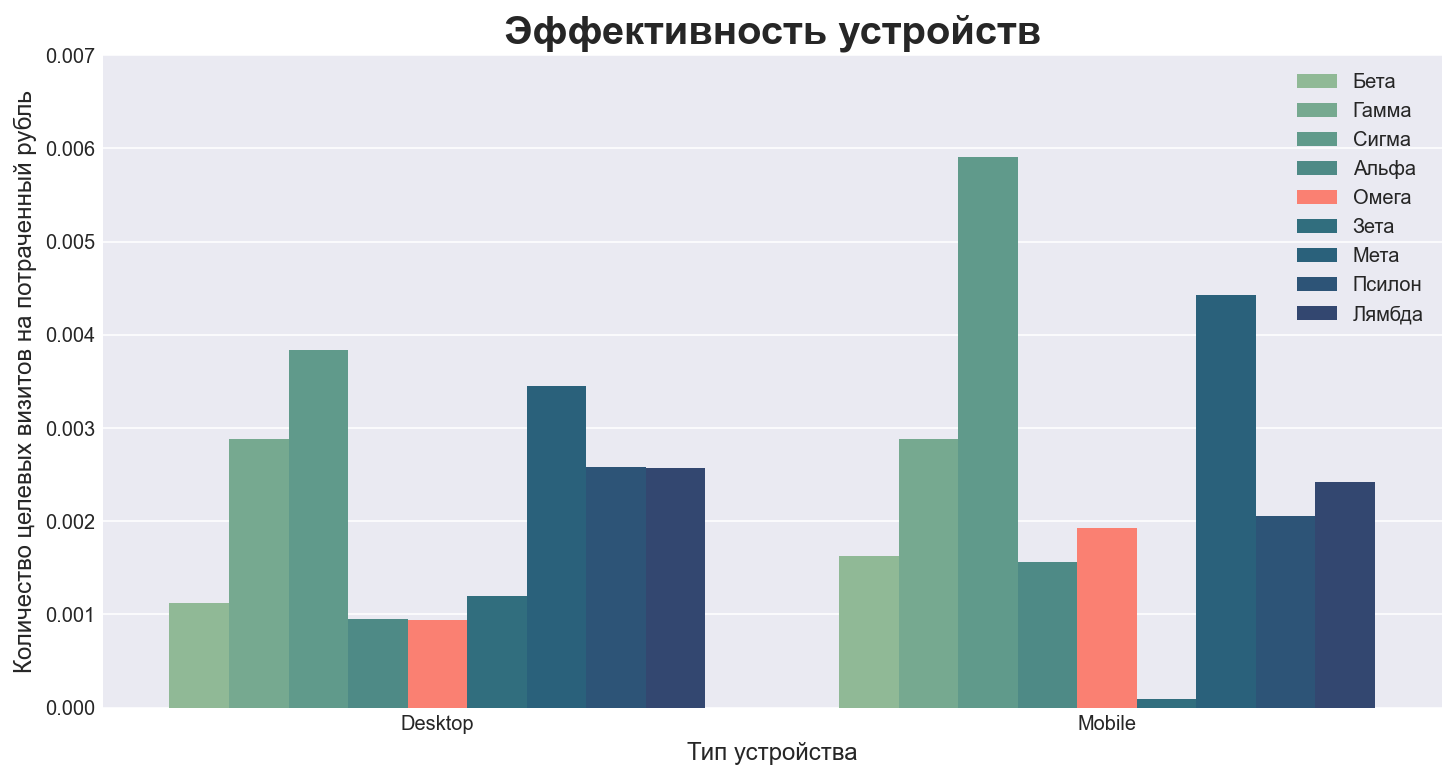

In [21]:
bar('device', 'Эффективность устройств', 'Тип устройства', 0.007)